**Juan Esteban Floyd**
**Juan David Aycardi**

# **Algoritmo K-medias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#datos de ejemplo
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0, cluster_std=0.40)

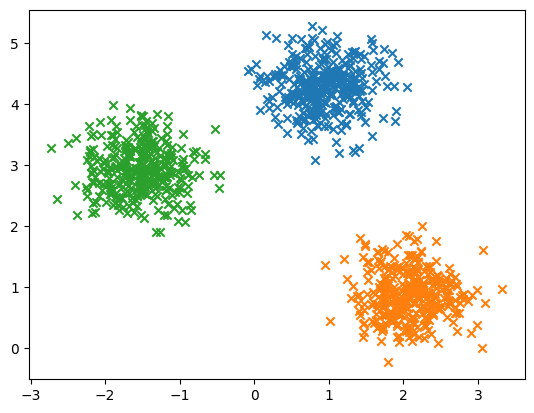

In [ ]:
for i in range(3):
  data = X[y==i,:]
  plt.scatter(data[:, 0], data[:, 1], marker="x")

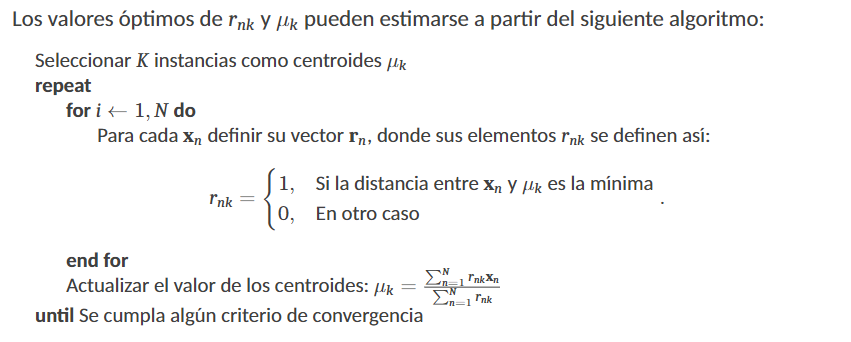

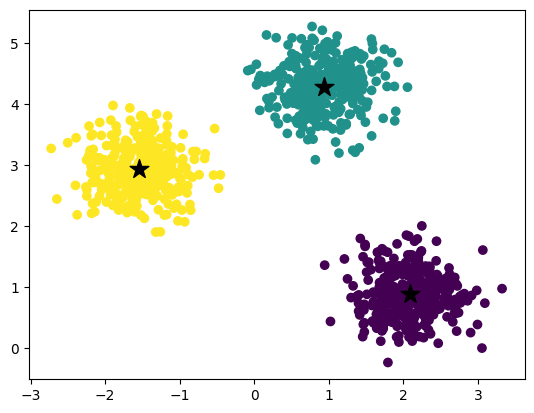

In [ ]:

# Definimos el número de clusters
k = 3

# Inicializamos aleatoriamente los centroides de los clusters
R_nk = X[np.random.choice(X.shape[0], k, replace=False)]


maxIter = 100

while maxIter > 0:
    # Paso 1: Calcular la asignación U_nk de los puntos de entrada a los clusters
    distancias = np.linalg.norm(X[:,np.newaxis,:] - R_nk, axis=2)
    
    U_nk = np.argmin(distancias, axis=1)
    
    # Paso 2: Actualizar los centroides R_nk de los clusters
    new_R_nk = np.array([X[U_nk == i].mean(axis=0) for i in range(k)])
    
    R_nk = new_R_nk
    
    maxIter -= 1

# Función para graficar los resultados
def plot_clusters(X, R_nk, U_nk):
    plt.scatter(X[:, 0], X[:, 1], c=U_nk)
    plt.scatter(R_nk[:, 0], R_nk[:, 1], marker='*', s=200, c='k')
    plt.show()

# Graficamos los resultados
plot_clusters(X, R_nk, U_nk)

K Medias de Sklearn para comparar:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-1.54212249  2.93117201]
 [ 2.08425231  0.88574982]
 [ 0.92911452  4.28452181]]


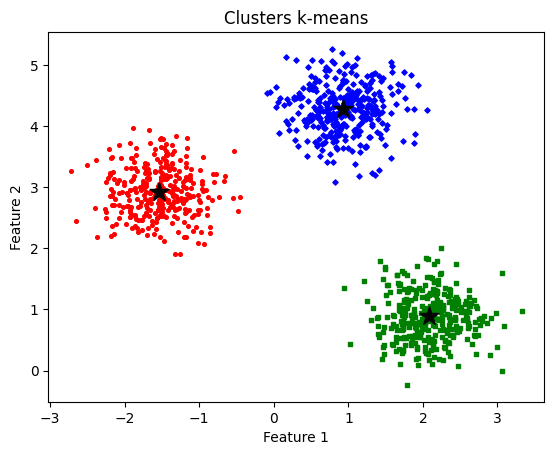

In [ ]:
from sklearn.cluster import KMeans

#%% Aplicación de k-means con k = 3.
kmeans = KMeans(n_clusters=3).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

#datos de ejemplo
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0, cluster_std=0.40)

#%% Aplicación de k-means con k = 3.
kmeans = KMeans(n_clusters=3).fit(X)
centroides = kmeans.cluster_centers_

# Lista de colores y marcadores
colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
marcadores = ['o', 's', 'D', '^', 'v', '*', 'P']

# Creación de la figura y subplots
fig, ax = plt.subplots()

# Graficar los puntos de cada cluster
for i in range(len(centroides)):
    # Selecciona los puntos del cluster i
    points = np.array([X[j] for j in range(len(X)) if kmeans.labels_[j] == i])
    # Grafica los puntos
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colores[i], marker=marcadores[i])

# Graficar los centroides
ax.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=200, c='#050505')

# Título y etiquetas de los ejes
ax.set_title('Clusters k-means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Mostrar la figura
plt.show()


# **Mezcla de gaussianas**

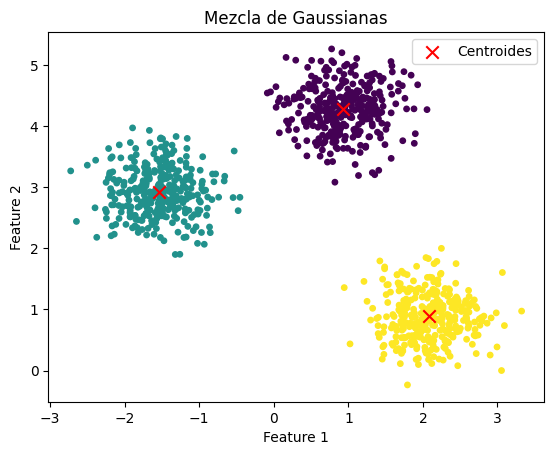

In [ ]:
from scipy.stats import multivariate_normal
# Función para inicializar los parámetros del modelo

def initialize(X, k):
    n_samples, n_features = X.shape    
    # Inicializar los parámetros
    means = X[np.random.choice(n_samples, k, replace=False)]
    covariances = np.array([np.eye(n_features)] * k)
    weights = np.ones(k) / k
    return means, covariances, weights

def probabilities(X, means, covariances, weights):
    k = means.shape[0]
    n_samples = X.shape[0]
    probs = np.zeros((n_samples, k))
    for i in range(k):
        probs[:, i] = weights[i] * multivariate_normal.pdf(X, means[i], covariances[i])
    return probs

# Función para actualizar los parámetros del modelo
def updateParams(X, means, covariances, weights, responsibilities):
    k = means.shape[0]
    n_samples = X.shape[0]
    # Calcular los nuevos pesos
    weights = np.mean(responsibilities, axis=0)
    # Calcular los nuevos centros
    means = np.dot(responsibilities.T, X) / np.sum(responsibilities, axis=0)[:, np.newaxis]
    # Calcular las nuevas matrices de covarianza
    for i in range(k):
        diff = X - means[i]
        covariances[i] = np.dot((responsibilities[:, i] * diff.T), diff) / np.sum(responsibilities[:, i])
    return means, covariances, weights

# Función para entrenar el modelo
def fit(X, k, n_iter):
    means, covariances, weights = initialize(X, k)   
    for _ in range(n_iter):
        # E-step: Calcular las responsabilidades
        responsibilities = []
        for i in range(k):
            density = multivariate_normal.pdf(X, means[i], covariances[i])
            responsibilities.append(weights[i] * density)
        responsibilities = np.array(responsibilities).T
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
        # M-step: Actualizar los parámetros
        means, covariances, weights = updateParams(X, means, covariances, weights, responsibilities)
    return means, covariances, weights

# Ajustar el modelo de mezcla de gaussianas
k = 3
n_iter = 150 
means, covariances, weights = fit(X, k, n_iter)

# Predecir las etiquetas de los datos de entrada
probs = probabilities(X, means, covariances, weights)
labels = np.argmax(probs, axis=1)

# Visualizar los datos y las regiones de decisión
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='x', c='red', s=80, label='Centroides')
plt.legend()
plt.title('Mezcla de Gaussianas')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Mezcla de gaussianas con sklearn

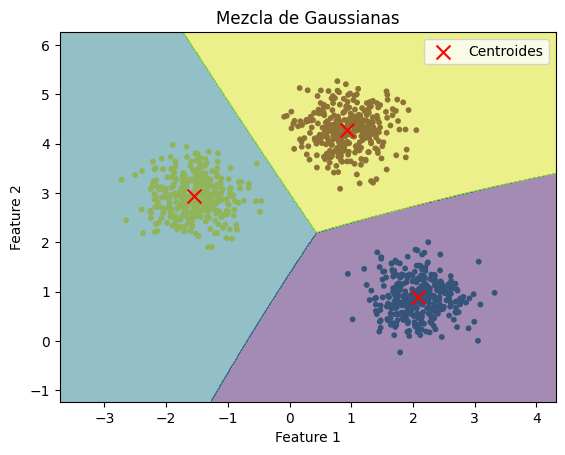

In [ ]:
from sklearn.mixture import GaussianMixture
# Crear y ajustar el modelo de mezcla de gaussianas

k = 3  # Número de componentes
model = GaussianMixture(n_components=k)
model.fit(X)

# Obtener los parámetros del modelo
means = model.means_
covariances = model.covariances_
weights = model.weights_

# Generar nuevos puntos para visualizar las distribuciones ajustadas
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y las distribuciones ajustadas
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=100, label='Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mezcla de Gaussianas')
plt.legend()
plt.show()